## Predicting the SOH of Batteries Using Machine Learning

In [0]:
%run "./#Includes/Preprocessing-Setup"

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR

In [0]:
B0005 = loadMat('B0005.mat')
B0006 = loadMat('B0006.mat')
B0007 = loadMat('B0007.mat')
B0018 = loadMat('B0018.mat')

In [0]:
dfB0005 = getDataframe(B0005)

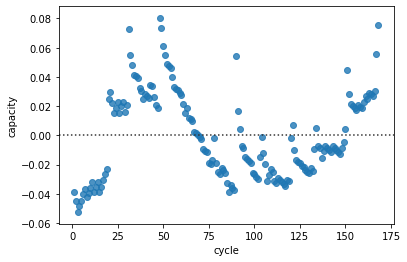

In [0]:
sns.residplot(dfB0005['cycle'], dfB0005['capacity'])

In [0]:
dfB0006 = getDataframe(B0006)
dfB0007 = getDataframe(B0007)
dfB0018 = getDataframe(B0018)

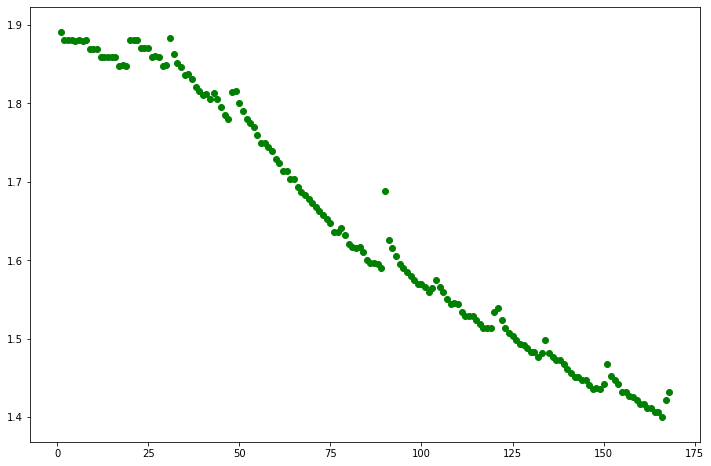

In [0]:
X = dfB0007['cycle']
Y = dfB0007['capacity']
fig, ax = plt.subplots(1, figsize=(12, 8))
ax.scatter(X, Y, color='green', label='Battery')

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

In [0]:
lst_x, lst_y = rollingAverage(X_train, y_train)
d = {'X_train':X_train.values,'y_train':y_train.values}

In [0]:
d = pd.DataFrame(d)
d = d[~d['X_train'].isin(lst_x)]

In [0]:
X_train = d['X_train']
y_train = d['y_train']

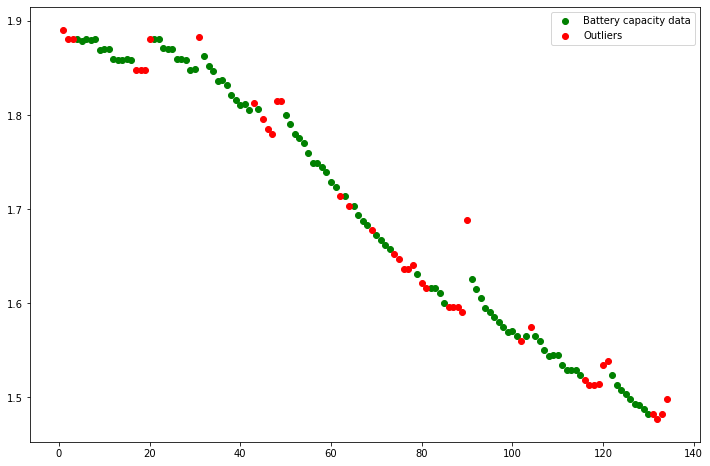

In [0]:
fig, ax = plt.subplots(1, figsize=(12, 8))

ax.scatter(X_train, y_train, color='green', label='Battery capacity data')
ax.scatter(lst_x, lst_y, color='red', label='Outliers')
ax.legend()

In [0]:
X_train = X_train.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)

In [0]:
best_svr = SVR(C=20, epsilon=0.0001, gamma=0.00001, cache_size=200, kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
best_svr.fit(X_train,y_train)

/databricks/python/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 y = column_or_1d(y, warn=True)
Out[17]: SVR(C=20, cache_size=200, coef0=0.0, degree=3, epsilon=0.0001, gamma=1e-05,
 kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
y_pred = best_svr.predict(X.values.reshape(-1, 1))

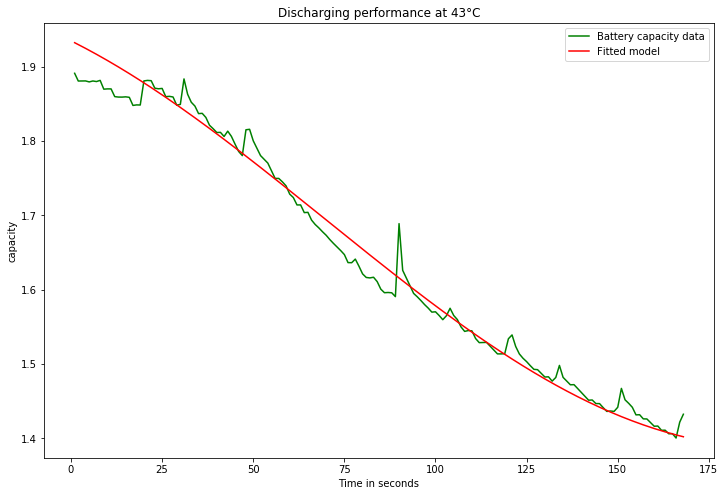

In [0]:
fig, ax = plt.subplots(1, figsize=(12, 8))

ax.plot(X, Y, color='green', label='Battery capacity data')
ax.plot(X, y_pred, color='red', label='Fitted model')
ax.set(xlabel='Time in seconds', ylabel='capacity', title='Discharging performance at 43°C')
ax.legend()

In [0]:
X = dfB0005['cycle']
Y = dfB0005['capacity']
ratios = [40, 30, 20, 10]
for ratio in ratios:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=ratio, shuffle=False)
    lst_x, lst_y = rollingAverage(X_train, y_train)
    d = {'X_train':X_train.values,'y_train':y_train.values}
    d = pd.DataFrame(d)
    d = d[~d['X_train'].isin(lst_x)]
    X_train = d['X_train']
    y_train = d['y_train']
    X_train = X_train.values.reshape(-1, 1)
    y_train = y_train.values.reshape(-1, 1)
    best_svr = SVR(C=20, epsilon=0.0001, gamma=0.0001, cache_size=200,
      kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
    best_svr.fit(X_train,y_train)
    if ratio == 40:
        y_pred_40 = best_svr.predict(X.values.reshape(-1, 1))
    elif ratio == 30:
        y_pred_30 = best_svr.predict(X.values.reshape(-1, 1))
    elif ratio == 20:
        y_pred_20 = best_svr.predict(X.values.reshape(-1, 1))
    elif ratio == 10:
        y_pred_10 = best_svr.predict(X.values.reshape(-1, 1))      

/databricks/python/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 y = column_or_1d(y, warn=True)
/databricks/python/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 y = column_or_1d(y, warn=True)
/databricks/python/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 y = column_or_1d(y, warn=True)
/databricks/python/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 y = column_or_1d(y, warn=True)

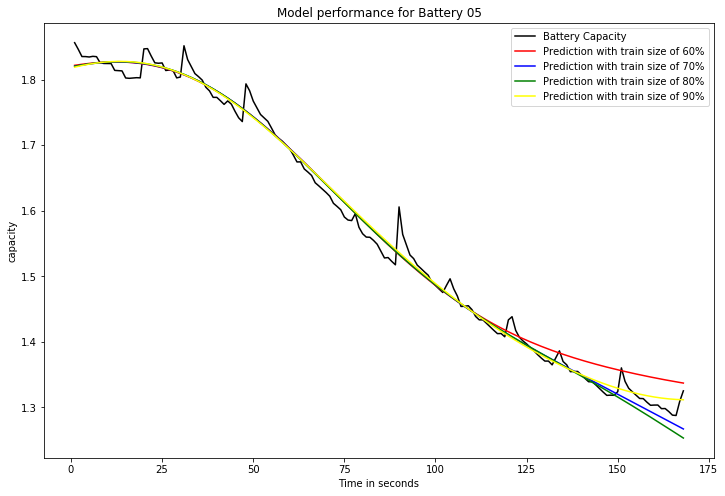

In [0]:
fig, ax = plt.subplots(1, figsize=(12, 8))

ax.plot(X, Y, color='black', label='Battery Capacity')
ax.plot(X, y_pred_40, color='red', label='Prediction with train size of 60%')
ax.plot(X, y_pred_30, color='blue', label='Prediction with train size of 70%')
ax.plot(X, y_pred_20, color='green', label='Prediction with train size of 80%')
ax.plot(X, y_pred_10, color='yellow', label='Prediction with train size of 90%')

ax.set(xlabel='Time in seconds', ylabel='capacity', title='Model performance for Battery 05')
ax.legend()    

In [0]:
X = dfB0006['cycle']
Y = dfB0006['capacity']
ratios = [40, 30, 20, 10]
for ratio in ratios:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=ratio, shuffle=False)
    lst_x, lst_y = rollingAverage(X_train, y_train)
    d = {'X_train':X_train.values,'y_train':y_train.values}
    d = pd.DataFrame(d)
    d = d[~d['X_train'].isin(lst_x)]
    X_train = d['X_train']
    y_train = d['y_train']
    X_train = X_train.values.reshape(-1, 1)
    y_train = y_train.values.reshape(-1, 1)
    best_svr = SVR(C=10, epsilon=0.0001, gamma=0.0001, cache_size=200,
      kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
    best_svr.fit(X_train,y_train)
    if ratio == 40:
        y_pred_40 = best_svr.predict(X.values.reshape(-1, 1))
    elif ratio == 30:
        y_pred_30 = best_svr.predict(X.values.reshape(-1, 1))
    elif ratio == 20:
        y_pred_20 = best_svr.predict(X.values.reshape(-1, 1))
    elif ratio == 10:
        y_pred_10 = best_svr.predict(X.values.reshape(-1, 1))

/databricks/python/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 y = column_or_1d(y, warn=True)
/databricks/python/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 y = column_or_1d(y, warn=True)
/databricks/python/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 y = column_or_1d(y, warn=True)
/databricks/python/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 y = column_or_1d(y, warn=True)

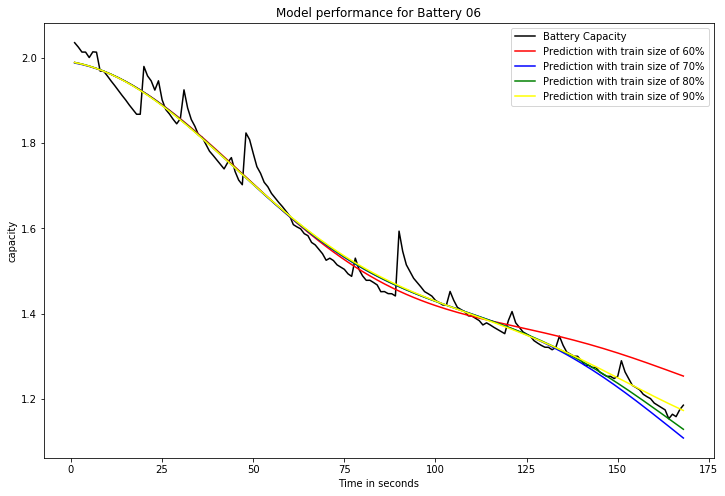

In [0]:
fig, ax = plt.subplots(1, figsize=(12, 8))

ax.plot(X, Y, color='black', label='Battery Capacity')
ax.plot(X, y_pred_40, color='red', label='Prediction with train size of 60%')
ax.plot(X, y_pred_30, color='blue', label='Prediction with train size of 70%')
ax.plot(X, y_pred_20, color='green', label='Prediction with train size of 80%')
ax.plot(X, y_pred_10, color='yellow', label='Prediction with train size of 90%')

ax.set(xlabel='Time in seconds', ylabel='capacity', title='Model performance for Battery 06')
ax.legend()

In [0]:
X = dfB0007['cycle']
Y = dfB0007['capacity']
ratios = [40, 30, 20, 10]
for ratio in ratios:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=ratio, shuffle=False)
    lst_x, lst_y = rollingAverage(X_train, y_train)
    d = {'X_train':X_train.values,'y_train':y_train.values}
    d = pd.DataFrame(d)
    d = d[~d['X_train'].isin(lst_x)]
    X_train = d['X_train']
    y_train = d['y_train']
    X_train = X_train.values.reshape(-1, 1)
    y_train = y_train.values.reshape(-1, 1)
    best_svr = SVR(C=10, epsilon=0.0001, gamma=0.0001, cache_size=200,
      kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
    best_svr.fit(X_train,y_train)
    if ratio == 40:
        y_pred_40 = best_svr.predict(X.values.reshape(-1, 1))
    elif ratio == 30:
        y_pred_30 = best_svr.predict(X.values.reshape(-1, 1))
    elif ratio == 20:
        y_pred_20 = best_svr.predict(X.values.reshape(-1, 1))
    elif ratio == 10:
        y_pred_10 = best_svr.predict(X.values.reshape(-1, 1))

/databricks/python/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 y = column_or_1d(y, warn=True)
/databricks/python/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 y = column_or_1d(y, warn=True)
/databricks/python/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 y = column_or_1d(y, warn=True)
/databricks/python/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 y = column_or_1d(y, warn=True)

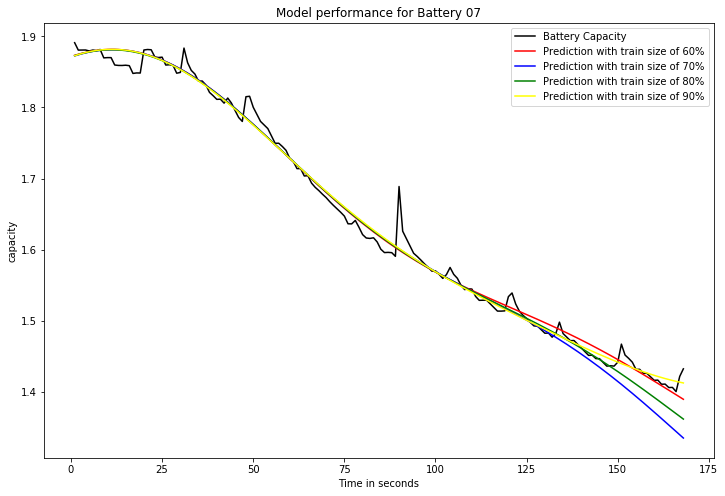

In [0]:
fig, ax = plt.subplots(1, figsize=(12, 8))

ax.plot(X, Y, color='black', label='Battery Capacity')
ax.plot(X, y_pred_40, color='red', label='Prediction with train size of 60%')
ax.plot(X, y_pred_30, color='blue', label='Prediction with train size of 70%')
ax.plot(X, y_pred_20, color='green', label='Prediction with train size of 80%')
ax.plot(X, y_pred_10, color='yellow', label='Prediction with train size of 90%')

ax.set(xlabel='Time in seconds', ylabel='capacity', title='Model performance for Battery 07')
ax.legend()

In [0]:
X = dfB0018['cycle']
Y = dfB0018['capacity']
ratios = [40, 30, 20, 10]
for ratio in ratios:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=ratio, shuffle=False)
    lst_x, lst_y = rollingAverage(X_train, y_train)
    d = {'X_train':X_train.values,'y_train':y_train.values}
    d = pd.DataFrame(d)
    d = d[~d['X_train'].isin(lst_x)]
    X_train = d['X_train']
    y_train = d['y_train']
    X_train = X_train.values.reshape(-1, 1)
    y_train = y_train.values.reshape(-1, 1)
    best_svr = SVR(C=20, epsilon=0.0001, gamma=0.00001, cache_size=200,
      kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
    best_svr.fit(X_train,y_train)
    if ratio == 40:
        y_pred_40 = best_svr.predict(X.values.reshape(-1, 1))
    elif ratio == 30:
        y_pred_30 = best_svr.predict(X.values.reshape(-1, 1))
    elif ratio == 20:
        y_pred_20 = best_svr.predict(X.values.reshape(-1, 1))
    elif ratio == 10:
        y_pred_10 = best_svr.predict(X.values.reshape(-1, 1))

/databricks/python/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 y = column_or_1d(y, warn=True)
/databricks/python/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 y = column_or_1d(y, warn=True)
/databricks/python/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 y = column_or_1d(y, warn=True)
/databricks/python/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 y = column_or_1d(y, warn=True)

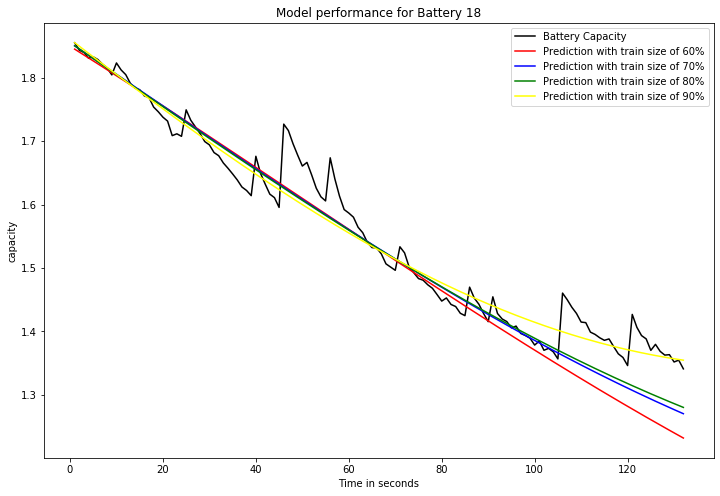

In [0]:
fig, ax = plt.subplots(1, figsize=(12, 8))

ax.plot(X, Y, color='black', label='Battery Capacity')
ax.plot(X, y_pred_40, color='red', label='Prediction with train size of 60%')
ax.plot(X, y_pred_30, color='blue', label='Prediction with train size of 70%')
ax.plot(X, y_pred_20, color='green', label='Prediction with train size of 80%')
ax.plot(X, y_pred_10, color='yellow', label='Prediction with train size of 90%')

ax.set(xlabel='Time in seconds', ylabel='capacity', title='Model performance for Battery 18')
ax.legend()
plt.show()

Copyright © 2021 YJPark.